<a href="https://colab.research.google.com/github/cdkuea/456469ek-/blob/main/Maestr%C3%ADa_teor%C3%ADa_04_Bagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/dieguito1331/cienciaDatos/blob/master/maestria/teoria/04 - Bagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ensembles**
Los modelos estadísticos y de Machine Learning poseen un problema que es el equilibrio entre el sesgo (bias) y la varianza (variance)  
El concepto de **sesgo** hace referencia a cuánto en promedio los valores con respecto a los valores reales. Es decir, nos dice qué tan real es la relación que encontró entre los predictores y la variable respuesta.  
El término varianza nos dice cuánto cambia el modelo dependiendo de los datos utilizados en el entrenamiento. Lo que uno espera que un modelo pueda _**generalizar**_ su comportamiento, es decir, que con observaciones sucesivas (diferentes a las que se utilizó en el entrenamiento) el modelo no varíe demasiado sus resultados.  
A medida que se aumenta la complejidad del modelo, éste logra adaptarse mejor a la realidad que se debe modelar, no obstante, si esta complejidad no es medida, puede aparecer un concepto denominado _overfitting_, esto significa que el modelo se ajusta tanto a los datos de entrenamiento que no es capaz de identificar nuevas observaciones. Por tal motivo, el mejor modelo será aquel que pueda equilibrar de la mejor manera el sesgo y la varianza.  
La gran pregunta será, ¿cómo puedo controlar el sesgo y la varianza? Los árboles pequeños tienen poca varianza pero consiguen representar bien la relación entre las variables (alto sesgo). Por el contrario, árboles grandes se ajustan mucho a los datos de entrenamiento, por ende el sesgo es bajo pero la varianza es muy alta. Un método para resolver esta problemática es trabajar con métodos de _ensembles_.  
Los **ensembles** son métodos que combinan múltiples modelos en uno sólo que tienen como objetivo lograr un equilibrio entre el sesgo y la varianza. Los dos ensembles más utilizados son:
-  **Bagging**: Se generan muchos modelos, con un subconjunto distinto de datos para cada uno de los mismo. (Estos subconjuntos son armados en base a los datos de entrenamiento). Todos los modelos aportan a la hora de dar el _veredicto_ final, siendo así el valor final como la media de todas las predicciones(variables continuas) o la clase más frecuente (variables categóricas). El modelo más utilizado de esta técnica se denomina **Random Forest**
- En el bagging se emplean modelos con muy poco sesgo pero muchísima varianza, lo que agregando dichos modelos se loggra reducir dicha varianza sin apenas modificar el sesgo.
- En cambio en el boosting se emplean modelos con muy poca varianza pero mucho sesgo, que ajustanto secuencialmente, los modelos reducen.

En el bagging la forma de tomar muestras aleatorias sobre la base de entrenamiento se realiza sobre la técnica de bootstraping. En los modelos boosting se ajustan los pesos de cad modelo en base a cada iteración.

Estos tipos de modelos tienen un gran resultado en comparación de otros modelos más clásicos (por ejemplo regresiones logísticas, etc) pero se pierde un poco la interpretabilidad de los modelos. 

## **Bagging** (Bootstrap aggregation)
Dadas $n$ mestras de observaciones independientes $Z_1, .., >_n$, cada una con una varianza $\epsilon^2$, la varianza de la media de las observaciones es de $\epsilon^2/n$. Dicho de otra forma, al promediar un con junto de observaciones, se reduce la varianza.  
El Random Forest es una implementación del método Bagging con una diferencia, utiliza además una selección m predictores para cada una de las muestras armadas.

![imagen](https://miro.medium.com/max/722/1*zbA_Ebgi1AC1dY5gpvHXdg.png)


**Principales pasos relacionados al modelo Bagging**:
- Creación de múltipes datasets: Sobre un único data set se crean n subdatasets, cada muestreo se realiza con la técnica de bootstrap con repetición. La cantidad de subsets será igual a la cantidad de iteraciones o clasificadores / regresores que se armen.
- Construcción de múltiples clasificadores / regresores: Con cada una de las muestras creadas se arman los diferentes modelos. 
- Combinación de los modelos: Las predicciones de los modelos individuales se combinan para obtener un único resultado 


### bootstrapping 
source: [towardsdatascience.com](https://deepnote.com/@a_mas/Bootstrapping-en-Python-9ad885fd-c261-475e-b2b7-6461fd65490a)


![imagen](https://deepnote.com/publish/9ad885fd-c261-475e-b2b7-6461fd65490a/14fd44ff-2902-4239-8cc6-0a3e073b1da8/file?path=bootstrapping.jpeg)

El bootstrapping (o bootstrap) es un método de remuestreo propuesto por Bradley Efron en 1979. Se utiliza para aproximar la distribución en el muestreo de un estadístico. Se usa frecuentemente para aproximar el sesgo o la varianza de un análisis estadístico, así como para construir intervalos de confianza o realizar contrastes de hipótesis sobre parámetros de interés. En la mayor parte de los casos no pueden obtenerse expresiones cerradas para las aproximaciones bootstrap y por lo tanto es necesario obtener remuestras en un ordenador para poner a prueba el método. La enorme potencia de cálculo de los ordenadores actuales facilita considerablemente la aplicabilidad de este método tan costoso computacionalmente.

La idea básica de bootstrap es que la inferencia sobre una población a partir de datos de muestra, (muestra → población), puede ser modelada mediante un nuevo muestreo de los datos de la muestra y realizando la inferencia sobre una muestra a partir de datos remuestreados. Como la población es desconocida, el verdadero error en una muestra estadística contra su valor poblacional es desconocido. En las re-muestras de bootstrap, la 'población' es de hecho la muestra, y esto se conoce; por lo tanto, se puede medir la calidad de la inferencia de la muestra "verdadera" a partir de datos remuestreados, (muestra re-muestreada).

## implementación de Bootstrap en python

In [ ]:
import numpy as np
import random

In [ ]:
# Creamos una muestra aleatoria de 50.0000 personas que tienen una edad promedio de 25 años
data = np.random.normal(loc = 25, size = 50000)
data

array([24.75492956, 26.63961716, 25.06740859, ..., 23.80019917,
       24.69428602, 25.85914658])

In [ ]:
#Calculamos el promedio
data.mean()

25.00351775478018

In [ ]:
# Vamos a crear 500 muestras de tamaño 100 para estimar el promedio
promedio = []
for i in range(500):
    muestra = random.sample(data.tolist(), 100) #extraigo aleatoriamente de la base data 100 muestras y las convierto en lista.
    prom = np.mean(muestra)
    promedio.append(prom)

In [ ]:
np.mean(promedio)    

25.00186177787641

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import os


import pandas as pd
import numpy as np
#Este seteo de pandas sirve para que se puedan visualizar todas las columnas
#del dataframe#############################
pd.set_option('display.max_columns', None)#
###########################################

#Esta librería sirve para que oculte todo tipo de warnings que puedan 
#aparecer en el código. Generalmente si una función está por ser data de 
#baja o modificada en una librería, varias versiones antes aparecen estos
#tipos de advertencias cuando se ejecuta el código
import warnings###################
warnings.filterwarnings("ignore")#
##################################

#La función train_test_split sirve para dividir la base en dos partes
#Train y test para poder entrenar y validar un modelo#
from sklearn.model_selection import train_test_split##
######################################################

#Definimos las métricas
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve

import matplotlib.pyplot as plt

#Importo Random Forest
from sklearn.ensemble import RandomForestClassifier

import os
from google.colab import drive


### Monto la carpeta de Drive

In [ ]:
#Levanto drive para poder almacenar los archivos
drive.mount("/content/drive")
contentFolder = "/content/drive/MyDrive/Austral - Data Mining"
if not os.path.exists(contentFolder):
    os.mkdir(contentFolder)

Mounted at /content/drive


### Levanto la base 

In [ ]:
data = pd.read_csv("{}/titanicPreprocesada.txt".format(contentFolder), sep=";")

In [ ]:
data.head()

,index,Survived,Age,Fare,ageRatioTitle,woe_sibSp,withFamily,woe_parch,woe_title,ageRatioClass,fareRatioClass
0,0,0,22.000000,7.2500,0.785714,0.613513,1,-0.173905,-1.202121,0.916667,0.329545
1,1,1,26.000000,7.9250,1.194086,-0.166010,1,-0.173905,1.297772,1.083333,0.304808
2,2,0,35.000000,8.0500,1.250000,-0.166010,1,-0.173905,-1.202121,1.458333,0.230000
3,3,0,21.773973,8.4583,0.777642,-0.166010,1,-0.173905,-1.202121,0.907249,0.388459
4,4,0,2.000000,21.0750,0.500000,-0.484418,1,0.671764,0.758775,0.083333,10.537500


### Documentación de Scikit Learn

*La* documentación de la implementación del árbol de decisión de Sklearn se encuentra [aqui](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

### Divido la base
Divido la base en dos partes, una parte para entrenar el modelo (la llamaré train) y otra parte con la que testearé el modelo (la llamaré test)  
Utilizo una función de la librería scikit que se denomina train_test_split() y la documentación la pueden entrondar [aqui](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [ ]:
X = data.drop(columns = ["index", "Survived"])
y = data.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
print("Registros de la base de entrenamiento: {}, que es el {} de la base total".format(len(X_train), len(X_train)/len(X)))
print("Registros de la base de testeo: {}, que es el {} de la base total".format(len(X_test), len(X_test)/len(X)))

Registros de la base de entrenamiento: 596, que es el 0.6689113355780022 de la base total
Registros de la base de testeo: 295, que es el 0.33108866442199775 de la base total


### Entreno el modelo

In [ ]:
rfModel = RandomForestClassifier().fit(X_train, y_train)
rfProbs = rfModel.predict_proba(X_test)[:,-1]

## Calculo el _accuracy_ del modelo

In [ ]:
accuracy_score(y_test, rfProbs > 0.5)

0.8135593220338984

## Genero el gráfico de la curva ROC para el modelo de Random Forest

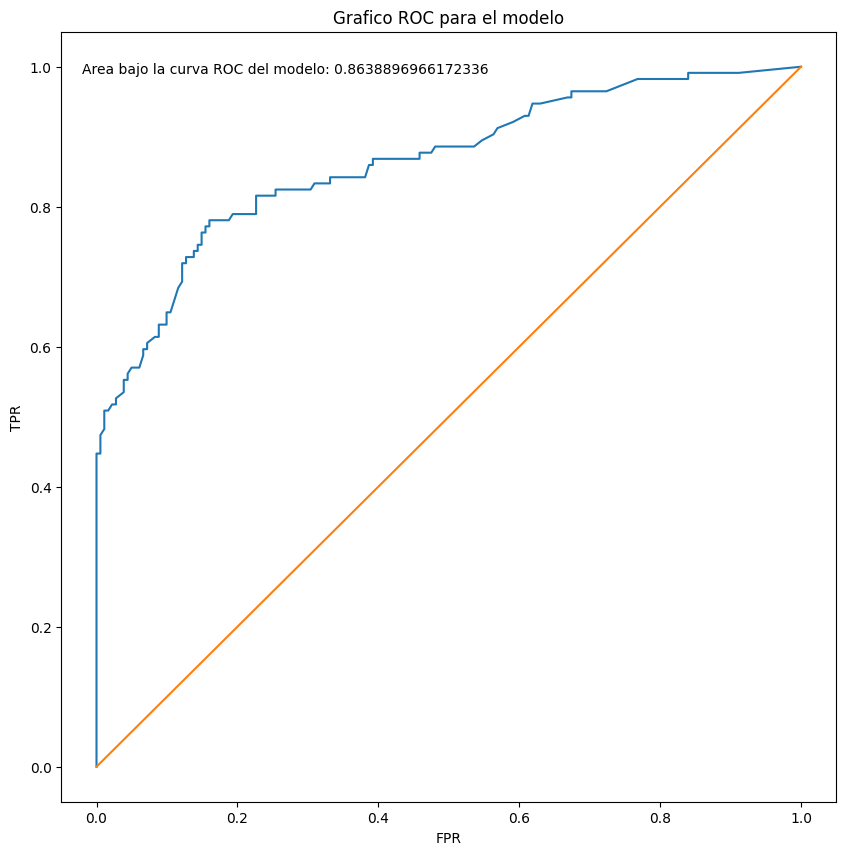

In [ ]:
#De esta forma graficamos la curva ROC y calculamos el área debajo de la curva
areaBajoCurvaRoc = roc_auc_score(y_test, rfProbs)
fpr, tpr, _ = roc_curve(y_test, rfProbs)
plt.figure(figsize=(10,10))
plt.title("Grafico ROC para el modelo")
plt.plot(fpr, tpr)
plt.plot([0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.annotate('Area bajo la curva ROC del modelo: {}'.format(areaBajoCurvaRoc), (-0.02,0.99))
plt.show()

## Creo el gráfico _Feature Importance_

([<matplotlib.axis.XTick at 0x7f9963faac40>,
 [Text(0, 0, 'woe_title'),
  Text(1, 0, 'fareRatioClass'),
  Text(2, 0, 'Fare'),
  Text(3, 0, 'ageRatioClass'),
  Text(4, 0, 'ageRatioTitle'),
  Text(5, 0, 'Age'),
  Text(6, 0, 'woe_sibSp'),
  Text(7, 0, 'woe_parch'),
  Text(8, 0, 'withFamily')])

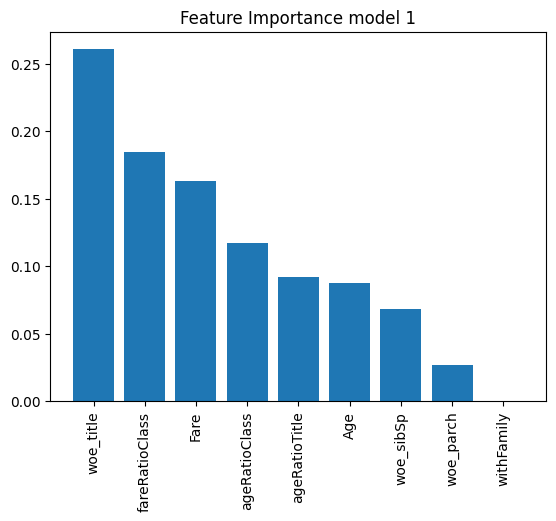

In [ ]:
#La importancia de las variables o feature importance nos permite identificar entre todos los modelos débiles que se generan las variables que más aparecen y te los pondera para 
#dar una explicación de las variables
importances = rfModel.feature_importances_
importances = importances / importances.sum()
indices = np.argsort(importances)[::-1][0:20]
names = [X_train.columns[i] for i in indices]
plt.figure()
plt.title("Feature Importance model 1")
plt.bar(range(len(names)), importances[indices])
plt.xticks(range(len(names)), names, rotation=90)


In [ ]:

X_test["probabilities"] =  rfProbs
#Normalizo el score y lo agrego como una nueva columna llamada normalizedscore.
X_test["normalizedScore"] = X_test.probabilities * 1000
#Armo los buckets cada 100 puntos
X_test["bucket"] = pd.cut(X_test.normalizedScore, np.array([0,100,200,300,400,500,600,700,800,900,1000]))
#Armo los deciles por scores
X_test['decile'] = pd.qcut(X_test.probabilities, 10, labels=False)



In [ ]:
X_test["Survived"] = y_test

measures = X_test.groupby("decile").agg({"Survived": ["sum", "count"]}) #agrupa por decile y calcula el total de casos (count) y los survived (sum).
measures.columns = ["Survived", "Cases"]
measures["notSurvived"] = measures["Cases"]-measures["Survived"] #calcula la cantidad de not survived.
measures["% no Survived"] = (measures["notSurvived"] / len(X_test[X_test.Survived == 0])).round(2)
measures["% Survived"] = (measures["Survived"] / len(X_test[X_test.Survived == 1])).round(2)
measures = measures.sort_index(ascending = False) #ordena por decile.
a = measures[["% no Survived", "% Survived"]]\
                .cumsum()\
                .rename(columns={"% no Survived": "% no Survived acum.", 
                                 "% Survived": "% Survived acum."})

measures = measures.join(a)
measures

,Survived,Cases,notSurvived,% no Survived,% Survived,% no Survived acum.,% Survived acum.
decile,,,,,,,
9,30,30,0,0.00,0.26,0.00,0.26
8,27,29,2,0.01,0.24,0.01,0.50
7,15,30,15,0.08,0.13,0.09,0.63
6,17,29,12,0.07,0.15,0.16,0.78
5,5,28,23,0.13,0.04,0.29,0.82
4,5,30,25,0.14,0.04,0.43,0.86
3,4,29,25,0.14,0.04,0.57,0.90
2,7,29,22,0.12,0.06,0.69,0.96
1,3,31,28,0.15,0.03,0.84,0.99


In [ ]:
measures = X_test.groupby("bucket").agg({"Survived": ["sum", "count"]})
measures.columns = ["Survived", "Cases"]
measures["notSurvived"] = measures["Cases"]-measures["Survived"]
measures["% no Survived"] = (measures["notSurvived"] / len(X_test[X_test.Survived == 0])).round(2)
measures["% Survived"] = (measures["Survived"] / len(X_test[X_test.Survived == 1])).round(2)
measures = measures.sort_index(ascending = False)
a = measures[["% no Survived", "% Survived"]]\
                .cumsum()\
                .rename(columns={"% no Survived": "% no Survived acum.", 
                                 "% Survived": "% Survived acum."})

measures = measures.join(a)
measures

,Survived,Cases,notSurvived,% no Survived,% Survived,% no Survived acum.,% Survived acum.
bucket,,,,,,,
"(900, 1000]",34,34,0,0.00,0.30,0.00,0.30
"(800, 900]",17,18,1,0.01,0.15,0.01,0.45
"(700, 800]",11,17,6,0.03,0.10,0.04,0.55
"(600, 700]",6,14,8,0.04,0.05,0.08,0.60
"(500, 600]",9,15,6,0.03,0.08,0.11,0.68
"(400, 500]",8,13,5,0.03,0.07,0.14,0.75
"(300, 400]",6,19,13,0.07,0.05,0.21,0.80
"(200, 300]",4,25,21,0.12,0.04,0.33,0.84
"(100, 200]",10,49,39,0.22,0.09,0.55,0.93
